In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# Create Zip of the combinations and pack them up
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list (unpacking into a list)
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple function to display the lat and long combinations
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
        citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

sentyabrskiy ru
torbay ca
safford us
ushuaia ar
hilo us
ushuaia ar
sembe cg
atuona pf
hobart au
ponta do sol cv
butaritari ki
khatanga ru
yar-sale ru
tasiilaq gl
cayenne gf
puerto ayora ec
nikolskoye ru
beian cn
bluff nz
busselton au
barentsburg sj
nanortalik gl
boa vista br
qaqortoq gl
cabo san lucas mx
dakar sn
kuala terengganu my
arraial do cabo br
kamenskoye ru
college us
rikitea pf
rikitea pf
ushuaia ar
cherskiy ru
viedma ar
noormarkku fi
hilo us
borovskoy kz
victor harbor au
vaini to
adrar dz
isangel vu
hermanus za
belushya guba ru
atuona pf
klaksvik fo
faanui pf
grand centre ca
longyearbyen sj
klaksvik fo
hobart au
provideniya ru
longyearbyen sj
butaritari ki
saint-philippe re
airai pw
tumannyy ru
yellowknife ca
popondetta pg
ushuaia ar
saskylakh ru
leningradskiy ru
cape town za
ponta do sol cv
lebu cl
grand river south east mu
nikolskoye ru
grindavik is
verkhnyaya maksakovka ru
tromso no
pisco pe
carnarvon au
mataura pf
lebu cl
vostok ru
puri in
cape town za
victoria sc
qaanaaq

karaul ru
ponta do sol cv
muriti tz
hermanus za
rikitea pf
port elizabeth za
bengkulu id
east london za
ancud cl
georgetown sh
flinders au
sao filipe cv
busselton au
ushuaia ar
hermanus za
yellowknife ca
lebu cl
coronel bogado py
port lincoln au
opuwo na
kahului us
bengkulu id
castro cl
domoni km
jamestown sh
haines junction ca
severo-kurilsk ru
georgetown gy
sabang id
saint-philippe re
san patricio mx
dwarka in
new norfolk au
butaritari ki
port alfred za
atuona pf
luderitz na
sitka us
mandurah au
mahebourg mu
busselton au
hilo us
ialibu pg
butterworth za
port elizabeth za
rikitea pf
jamestown sh
grand-santi gf
berlevag no
illoqqortoormiut gl
acari pe
bethel us
kahului us
boda cf
grand gaube mu
bairiki ki
bluff nz
barentsburg sj
bichena et
attawapiskat ca
atar mr
albany au
hobart au
jamestown sh
cabo san lucas mx
hadishahr ir
saint george bm
mercedes ar
kodiak us
albany au
castro cl
taolanaro mg
mataura pf
belushya guba ru
mount isa au
vila franca do campo pt
port alfred za
avarua ck
k

mar del plata ar
amderma ru
mar del plata ar
san patricio mx
rikitea pf
khonuu ru
uusikaupunki fi
ushuaia ar
naze jp
gushikawa jp
taolanaro mg
chara ru
hobart au
barrow us
tikapur np
ushuaia ar
sakakah sa
clyde river ca
new norfolk au
hermanus za
thompson ca
bambous virieux mu
butaritari ki
bluff nz
chapais ca
bluff nz
vaini to
santa cruz de la palma es
dikson ru
rikitea pf
butaritari ki
taolanaro mg
grindavik is
arraial do cabo br
albany au
saskylakh ru
cape town za
ushuaia ar
punta arenas cl
toktogul kg
pangkalanbuun id
amderma ru
arraial do cabo br
hermanus za
pevek ru
ushuaia ar
kenai us
touros br
samarai pg
mataura pf
tigil ru
ushuaia ar
matsanga cg
vao nc
chokurdakh ru
normandin ca
punta arenas cl
kapaa us
hasaki jp
tuktoyaktuk ca
kapaa us
albany au
ushuaia ar
stekolnyy ru
lompoc us
port alfred za
grand river south east mu
ushuaia ar
auki sb
mataura pf
butaritari ki
kruisfontein za
hilo us
codrington ag
qaanaaq gl
avarua ck
clyde river ca
pochutla mx
flinders au
necochea ar
busse

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each lat and long combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)


587

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "aa8fddac199613166992d295efd57e02"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aa8fddac199613166992d295efd57e02


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | safford
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | sembe
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | yar-sale
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | cayenne
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | beian
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | nanortalik
Processing Record 22 of Set 1 | 

Processing Record 36 of Set 4 | chazuta
Processing Record 37 of Set 4 | chara
Processing Record 38 of Set 4 | hanstholm
Processing Record 39 of Set 4 | cruzilia
Processing Record 40 of Set 4 | bell ville
Processing Record 41 of Set 4 | pando
Processing Record 42 of Set 4 | zitlala
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | doume
Processing Record 45 of Set 4 | novobureyskiy
Processing Record 46 of Set 4 | avarua
Processing Record 47 of Set 4 | imeni stepana razina
Processing Record 48 of Set 4 | talnakh
Processing Record 49 of Set 4 | galle
Processing Record 50 of Set 4 | harper
Processing Record 1 of Set 5 | kangaatsiaq
Processing Record 2 of Set 5 | amderma
City not found. Skipping...
Processing Record 3 of Set 5 | kropotkin
Processing Record 4 of Set 5 | carauari
Processing Record 5 of Set 5 | soe
Processing Record 6 of Set 5 | puerto escondido
Processing Record 7 of Set 5 | kyenjojo
Processing Record 8 of Set 5 | westport
Processing Record 9 of Set

Processing Record 29 of Set 8 | mujiayingzi
Processing Record 30 of Set 8 | tarsus
Processing Record 31 of Set 8 | vredendal
Processing Record 32 of Set 8 | vao
Processing Record 33 of Set 8 | oxapampa
Processing Record 34 of Set 8 | sorland
Processing Record 35 of Set 8 | dikson
Processing Record 36 of Set 8 | coahuayana
Processing Record 37 of Set 8 | husavik
Processing Record 38 of Set 8 | kruisfontein
Processing Record 39 of Set 8 | havelock
Processing Record 40 of Set 8 | charagua
Processing Record 41 of Set 8 | ulaangom
Processing Record 42 of Set 8 | valentin gomez farias
Processing Record 43 of Set 8 | umm kaddadah
Processing Record 44 of Set 8 | tongren
Processing Record 45 of Set 8 | natal
Processing Record 46 of Set 8 | santa cruz
Processing Record 47 of Set 8 | ilulissat
Processing Record 48 of Set 8 | dubbo
Processing Record 49 of Set 8 | panama city
Processing Record 50 of Set 8 | faya
Processing Record 1 of Set 9 | slave lake
Processing Record 2 of Set 9 | ola
Processing

Processing Record 20 of Set 12 | tikapur
Processing Record 21 of Set 12 | sakakah
Processing Record 22 of Set 12 | chapais
Processing Record 23 of Set 12 | santa cruz de la palma
Processing Record 24 of Set 12 | toktogul
Processing Record 25 of Set 12 | pangkalanbuun
Processing Record 26 of Set 12 | kenai
Processing Record 27 of Set 12 | tigil
Processing Record 28 of Set 12 | matsanga
City not found. Skipping...
Processing Record 29 of Set 12 | normandin
Processing Record 30 of Set 12 | stekolnyy
City not found. Skipping...
Processing Record 31 of Set 12 | auki
Processing Record 32 of Set 12 | pochutla
Processing Record 33 of Set 12 | sibu
Processing Record 34 of Set 12 | vitim
Processing Record 35 of Set 12 | yatou
Processing Record 36 of Set 12 | santa catarina de tepehuanes
Processing Record 37 of Set 12 | zhuhai
-----------------------------
Data Retrieval Complete      


In [11]:
len(city_data)

547

In [12]:
city_data

[{'City': 'Torbay',
  'Lat': 47.6666,
  'Lng': -52.7314,
  'Max Temp': 56.75,
  'Humidity': 91,
  'Cloudiness': 1,
  'Wind Speed': 6.91,
  'Country': 'CA',
  'Date': '2021-07-27 02:40:16'},
 {'City': 'Safford',
  'Lat': 32.834,
  'Lng': -109.7076,
  'Max Temp': 91.06,
  'Humidity': 37,
  'Cloudiness': 1,
  'Wind Speed': 9.22,
  'Country': 'US',
  'Date': '2021-07-27 02:40:17'},
 {'City': 'Ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 33.46,
  'Humidity': 86,
  'Cloudiness': 75,
  'Wind Speed': 5.75,
  'Country': 'AR',
  'Date': '2021-07-27 02:40:17'},
 {'City': 'Hilo',
  'Lat': 19.7297,
  'Lng': -155.09,
  'Max Temp': 78.53,
  'Humidity': 86,
  'Cloudiness': 75,
  'Wind Speed': 11.5,
  'Country': 'US',
  'Date': '2021-07-27 02:40:17'},
 {'City': 'Sembe',
  'Lat': 1.6481,
  'Lng': 14.5806,
  'Max Temp': 71.44,
  'Humidity': 87,
  'Cloudiness': 97,
  'Wind Speed': 5.59,
  'Country': 'CG',
  'Date': '2021-07-27 02:40:18'},
 {'City': 'Atuona',
  'Lat': -9.8,
  'Lng': -139.0333,
 

In [13]:
# Convert the array of dictionaries to a Pandas DF.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,56.75,91,1,6.91,CA,2021-07-27 02:40:16
1,Safford,32.8340,-109.7076,91.06,37,1,9.22,US,2021-07-27 02:40:17
2,Ushuaia,-54.8000,-68.3000,33.46,86,75,5.75,AR,2021-07-27 02:40:17
3,Hilo,19.7297,-155.0900,78.53,86,75,11.50,US,2021-07-27 02:40:17
4,Sembe,1.6481,14.5806,71.44,87,97,5.59,CG,2021-07-27 02:40:18
5,Atuona,-9.8000,-139.0333,77.47,75,36,21.59,PF,2021-07-27 02:40:18
6,Hobart,-42.8794,147.3294,60.66,59,40,4.00,AU,2021-07-27 02:38:42
7,Ponta Do Sol,32.6667,-17.1000,74.03,71,1,4.83,PT,2021-07-27 02:40:19
8,Butaritari,3.0707,172.7902,82.44,74,41,5.88,KI,2021-07-27 02:40:19
9,Khatanga,71.9667,102.5000,72.72,52,99,18.72,RU,2021-07-27 02:40:19


In [14]:
# Creating new Column order and assigning the previous DF to that new order
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Torbay,CA,2021-07-27 02:40:16,47.6666,-52.7314,56.75,91,1,6.91
1,Safford,US,2021-07-27 02:40:17,32.8340,-109.7076,91.06,37,1,9.22
2,Ushuaia,AR,2021-07-27 02:40:17,-54.8000,-68.3000,33.46,86,75,5.75
3,Hilo,US,2021-07-27 02:40:17,19.7297,-155.0900,78.53,86,75,11.50
4,Sembe,CG,2021-07-27 02:40:18,1.6481,14.5806,71.44,87,97,5.59
5,Atuona,PF,2021-07-27 02:40:18,-9.8000,-139.0333,77.47,75,36,21.59
6,Hobart,AU,2021-07-27 02:38:42,-42.8794,147.3294,60.66,59,40,4.00
7,Ponta Do Sol,PT,2021-07-27 02:40:19,32.6667,-17.1000,74.03,71,1,4.83
8,Butaritari,KI,2021-07-27 02:40:19,3.0707,172.7902,82.44,74,41,5.88
9,Khatanga,RU,2021-07-27 02:40:19,71.9667,102.5000,72.72,52,99,18.72


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


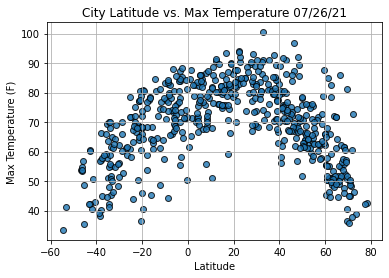

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

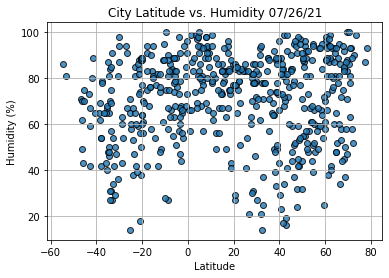

In [24]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

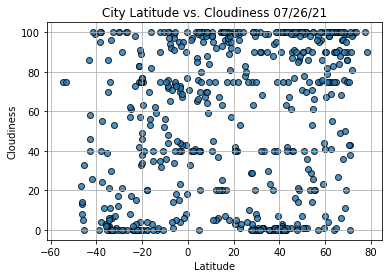

In [26]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

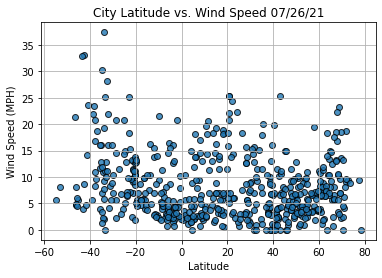

In [27]:
# Build the scatter plot for latitude vs. windspeed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()